## Risikoanalyse in Bezug auf Terroranschläge für international tätige Reiseunternehmen

## Inhaltsverzeichnis

[1. Einleitung](#1-einleitung)  
[2. Explorative Datenanalyse](#2-explorative-datenanalyse)  
[3. Unifying & Transformation](#3-unifying--transformation)  
[4. Data Cleansing](#4-data-cleansing)  
[5. Analysis & Validation](#5-analysis--validation)  
[6. Feature Selection & Engineering](#6-feature-selection--engineering)  
[7. Anwendung in Machine Learning](#7-anwendung-in-machine-learning)  
[8. Anwendung von XAI - Techniken](#8-anwendung-von-xai---techniken)  
[9. Fazit](#9-fazit)  
[10. Quellenverzeichnis](#10-quellenverzeichnis)

## 1. Einleitung

<u>Projektmitglieder:</u>

Elias Wolfsberger (wolfseli@students.zhaw.ch), Oliver Brennwald (brennoli@students.zhaw.ch), Florian Rieser (rieseflo@students.zhaw.ch)<br><br>

<u>Datenquelle:</u>

Global terrorism database (START, 2022)<br><br>

<u>Problem- & Fragestellung:</u>

Angesichts der wachsenden globalen Unsicherheiten und der Bedrohung durch Terrorismus sehen sich Reisebüros mit der Aufgabe konfrontiert, ihre Kunden über potenzielle Risiken zu informieren. Terroranschläge können nicht nur die Sicherheit von Reisen beeinträchtigen, sondern auch das Vertrauen der Reisenden in bestimmte Reiseziele untergraben. Vor diesem Hintergrund stellt sich die zentrale Frage: Wie können wir mithilfe der Global Terrorism Database (GTD) und moderner Machine-Learning-Technologien ein Prognosemodell entwickeln, das mögliche terroristische Angriffe in verschiedenen Regionen vorhersagt und den Reisebüros hilft, informierte Entscheidungen zu treffen, um ihre Kunden besser zu schützen?<br><br>

<u>Zielsetzung:</u>

Das Hauptziel dieses Projekts besteht darin, ein präzises und effektives Prognosemodell zu entwickeln, das auf der Analyse von Daten aus der Global Terrorism Database basiert. Dieses Modell wird darauf abzielen, Muster und Trends in Bezug auf terroristische Aktivitäten zu identifizieren und Vorhersagen über zukünftige Angriffe zu treffen. Durch die Bereitstellung dieser Informationen wollen wir Reisebüros einen signifikanten Mehrwert bieten, indem sie proaktive Massnahmen zur Risikominderung ergreifen können. Das letztliche Ziel besteht darin, die Sicherheit und das Vertrauen der Reisenden zu fördern, indem eine fundierte Entscheidungsgrundlage geschaffen wird.<br><br>

<u>Vorgehen & Methoden:</u>

1. Explorative Datenanalyse 

2. Unifying & Transformation

3. Data Cleansing

4. Analysis & Validation

5. Feature Selection & Engineering

6. Anwendung in Machine Learning

7. Anwendung von XAI - Techniken

## 2. Explorative Datenanalyse

Zuerst werden die benötigten Bibliotheken importiert.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nun wird die xlsx-Datei mit den Daten in einen Pandas Data-Frame geladen.   
Ausserdem verschaffen wir uns einen Überblick über die Daten, indem wir uns mit dem Attribut `v.shape` die Anzahl der Spalten und Zeilen des DataFrames anzeigen lassen.   
Um einen Einblick in die Daten zu bekommen, lassen wir uns zusätzlich mit der Funktion `.head()` die ersten 5 Zeilen des DataFrames anzeigen.

In [ ]:
# Daten laden
df = pd.read_excel('data/globalterrorismdb_0522dist.xlsx')

In [9]:
# Anzahl der Zeilen und Spalten anzeigen
print(df.shape)

print("--------------------")

# Erste 5 Zeilen anzeigen
df.head()

(209706, 135)
--------------------


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Der Datensatz besteht aus 135 Spalten und 209'706 Zeilen.  
Es werden aber noch nicht alle Spalten angezeigt. Dies wird mit `display.max.columns` geändert.   
Danach lassen wir uns diesmal die letzten 5 Zeilen ausgeben, um zu prüfen, ob nun alle Spalten angezeigt werden.

In [10]:
# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)

# letzte 5 Zeilen anzeigen
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
209701,202012310015,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,2.0,0,NaN,12/31/2020: Assailants fired mortar shells tar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,NaN,0.0,0.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Houses and buildings damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,2.0,0,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,6.0,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,1.0,0,NaN,12/31/2020: Assailants set fire to German Army...,1,1,0,1,1.0,Insurgency/Guerilla Action,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,German Army,Wolf-Class Vehicles,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-wing extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Military vehicles damaged,0.0,NaN,NaN,NaN,NaN,Na

### 2.1 Datentypen anzeigen

Nun möchten wir prüfen welche Datentypen das DataFrame enthält.   
Dazu geben wir mit `.info()` die Datentypen aller Spalten aus.

In [13]:
# info über die Daten
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype         
---   ------              --------------   -----         
 0    eventid             209706 non-null  int64         
 1    iyear               209706 non-null  int64         
 2    imonth              209706 non-null  int64         
 3    iday                209706 non-null  int64         
 4    approxdate          12689 non-null   object        
 5    extended            209706 non-null  int64         
 6    resolution          4861 non-null    datetime64[ns]
 7    country             209706 non-null  int64         
 8    country_txt         209706 non-null  object        
 9    region              209706 non-null  int64         
 10   region_txt          209706 non-null  object        
 11   provstate           209706 non-null  object        
 12   city                209279 non-null  object        
 13   latitude    

Wir finden folgende Datentypen in unserem DataFrame:

   - **int64 (23 Spalten)**: Ganze Zahlen, oft als Indikatoren (z. B. `crit1`, `crit2`), IDs (`eventid`, `country`), oder Kategorisierungen (`attacktype1`) verwendet.
   - **float64 (54 Spalten)**: Gleitkommazahlen, die meist numerische Messungen oder Zählungen darstellen. Zum Beispiel `nkill` (Anzahl der Toten) oder `nwound` (Anzahl der Verwundeten).
   - **datetime64[ns] (1 Spalte)**: Die Spalte `resolution` enthält als einzige Spalte Datumswerte.
   - **object (57 Spalten)**: Enthält hauptsächlich Zeichenketten (Strings) und wird für Textfelder Namen oder Beschreibungen verwendet, wie z.B. `country_txt`, `city` und `summary`.

Zur Vollständigkeit der Daten lässt sich folgenden feststellen:

   - Einige Spalten sind vollständig gefüllt und haben keine fehlenden Werte (z. B. `eventid`, `iyear`, `extended`).
   - Viele Spalten weisen jedoch eine hohe Anzahl an fehlenden Werten (`null`) auf, insbesondere bei seltener dokumentierten oder spezifischen Informationen, wie `ransomamt` (nur 1.533 Einträge) oder `claimmode3_txt` (nur 140 Einträge).
   - Diese fehlenden Werte deuten darauf hin, dass bestimmte Details oft nicht verfügbar oder selten dokumentiert sind.


### 2.2 Statistische Analyse

Wir möchten uns nun einen genaueren Überblick über die Werte verschaffen.   
Dazu nutzen wird die Funktion `.describe()`.

In [16]:
# Statistische Zusammenfassung
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.00000,209706.000000,209706.00000,209706.000000,209706.000000,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,2.097060e+05,2.097060e+05,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,130.291351,7.279854,22.836176,29.736188,1.468380,0.068854,0.988265,0.993291,0.866246,-0.423593,0.217338,0.145899,0.883628,0.035469,3.351311,0.159104,0.017901,8.484078,44.500434,125.858578,0.696628,3.648670,8.551887,0.079015,0.410599,1.007949,0.075811,0.003123,0.000362,0.003929,-45.488889,-0.896918,0.054166,0.832570,0.002785,0.025526,0.000658,0.004468,-0.144836,6.543060,9.710519,0.546436,0.763784,0.080708,0.126143,0.002174,0.003619,2.285810,0.026876,0.377395,2.79251,0.023633,0.09118,-0.712927,1.152342,4.036942e+04,0.052922,0.241657,-0.024658,-1.310324,-1.768986,-0.060442,2.040671e+04,1.123907e+03,2.813513e+03,0.631808,0.316209,-2.055606,-4.424289,-4.339318,0.086841,-3.850758
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,111.714562,2.905697,18.262718,55.663810,0.984961,0.281308,0.107693,0.081636,0.340389,2.305025,0.569323,0.353006,0.320672,0.184962,2.029153,0.909785,0.339838,6.602032,31.653622,92.128160,2.965494,15.177953,45.068601,1.022371,5.264265,17.616405,0.264696,0.055800,0.019034,0.062561,161.496761,9.927631,0.826684,2.416492,0.098203,0.459485,0.025644,0.187835,1.143478,2.296739,7.083110,1.990241,3.470668,0.791387,1.524439,0.119826,0.247620,11.012018,4.252691,3.511837,38.93325,2.295542,1.27149,3.288812,1.594933,6.717744e+06,0.561943,51.654696,1.790559,14.617634,29.233705,0.781662,2.427908e+06,2.965564e+05,6.203247e+05,151.254098,1.290364,18.140478,4.543800,4.640302,0.536943,4.677966
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,0.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,-9.000000,0.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,0.000000,-100.0

**Durchschnittswerte (Mean)**:  
   Die Spalten zeigen eine breite Variation der Mittelwerte. Beispielwerte:
   - `iyear` (Jahr): Durchschnitt bei ca. **2004.8**, was auf die Zeitspanne der Daten hindeutet.
   - `nkill` (Anzahl der Toten): Durchschnitt von etwa **2.79** deutet auf eine eher niedrige Opferzahl bei den meisten Ereignissen hin.
   - `propvalue` (Eigentumsschadenwert): Durchschnittswert bei **40369.42**, was zeigt, dass einige Ereignisse signifikante wirtschaftliche Verluste verursacht haben.

**Streuung (Standardabweichung)**:  
   Hohe Standardabweichungen in Spalten wie `nkill` (ca. **38.93**) und `propvalue` (ca. **6.2 Millionen**) zeigen, dass es signifikante Unterschiedemit mit möglichen Extremwerten zwischen den einzelnen Ereignissen gibt.

**Minimale und maximale Werte**:  
   Die Minima und Maxima verdeutlichen die Bandbreite der Daten:
   - `iyear` reicht von **1970** bis **2020**.
   - `nkill` variiert von **0** bis **1700**.
   - `propvalue` reicht von **0** bis **2.7 Milliarden**, was Extremwerte für Sachschäden widerspiegelt.
**Perzentile (25%, 50%, 75%)**:  
   Die Verteilung der Werte zeigt, dass:
   - 25% der Werte von `nkill` bei **0** liegen, was darauf hinweist, dass viele Ereignisse keine Todesopfer forderten.
   - 50% (Median) der `nkill`-Werte ebenfalls bei **0** liegen, was zeigt, dass die Mehrheit der Ereignisse geringe oder keine Todesopfer zur Folge hatte.
   - Bei `propvalue` liegen 75% der Werte bei **0**, was auf selten dokumentierte oder geringe Schadenswerte bei den meisten Ereignissen schließen lässt.


Mit `include=object` sorgen wir dafür, dass wir auch Informationen zu den Spalten die Objekte enthalten erhalten.   

In [17]:
# Statistische Zusammenfassung für kategorische Spalten
df.describe(include='object')

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,targtype2_txt,targsubtype2_txt,corp2,target2,natlty2_txt,targtype3_txt,targsubtype3_txt,corp3,target3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,claimmode_txt,claimmode2_txt,claimmode3_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,weapdetail,propextent_txt,propcomment,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706,209706
unique,3306,3560,204,12,2623,45148,51347,140086,6,9,10,8,22,113,38368,93527,216,23,109,3125,5753,162,21,94,508,851,117,3725,1370,491,72,138,17,17806,12,10,9,12,31,12,29,11,23,6,17,21363,6,21952,146,218,445,8,18815,103170,74764,43555,26,9393
top,0,0,Iraq,Middle East & North Africa,Baghdad,Unknown,0,0,0,Bombing/Explosion,0,0,Private Citizens & Property,Unnamed Civilian/Unspecified,0,Civilians,Iraq,0,0,0,0,0,0,0,0,0,0,Unknown,0,0,0,0,0,0,0,0,0,Explosives,Unknown Explosive Type,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,START Primary Collection,0
freq,197017,204845,27521,58252,8087,11067,142231,66120,174457,98158,201272,209048,51985,13552,42536,8071,26873,195171,195703,196198,195296,195495,208077,208167,208228,208078,208106,91906,202476,207127,209522,209292,209683,154648,185010,208974,209566,103475,48807,193304,195414,207335,207574,209633,209636,86569,136242,142282,209368,206393,209133,195615,173897,66182,116963,157030,106002,179102


**Eintragsanzahl (Count)**:  
   Jede Spalte in dieser Kategorie enthält **209.706 Einträge**. Dies zeigt, dass jede Kategorie über die gesamte Datenmenge hinweg vertreten ist, obwohl einige Werte `NaN` oder unbekannt sein könnten.

**Anzahl eindeutiger Werte (Unique)**:  
   Die Zahl der eindeutigen Einträge variiert je nach Spalte:
   - `country_txt` (Ländernamen) hat **204 eindeutige Werte**, was auf eine breite geografische Abdeckung hinweist.
   - `city` hat **45.148 eindeutige Werte**, was die Vielfalt der betroffenen Städte aufzeigt.
   - `attacktype1_txt` (Angriffstyp) hat **9 eindeutige Werte**, was eine begrenzte, festgelegte Liste an Angriffskategorien vermuten lässt.

**Häufigster Wert (Top)** und **Häufigkeit (Freq)**:  
   - In `country_txt` ist der häufigste Wert **"Iraq"**.  Dort fanden die meisten dokumentierten Ereignisse statt (27.521 Ereignisse).
   - In `attacktype1_txt` (Art des Angriffs) ist der häufigste Wert **"Bombing/Explosion"** mit **98.158 Einträgen**.
   - `target1` hat am häufigsten den Wert **"Civilians"** mit **80.71** Einträgen.

**Bedeutung von Häufigkeiten**:  
   Die Top-Werte und deren Häufigkeiten verdeutlichen, welche Länder, Angriffstypen, und Ziele überproportional häufig in den Daten vorkommen, und zeigen damit Schwerpunkte der dokumentierten Ereignisse. Beispielsweise ist **"START Primary Collection"** in der Spalte `dbsource` der häufigste Wert, was auf eine bevorzugte Datenquelle hinweist.

**Verteilung in Spalten mit hoher Einzigartigkeit**:  
   Spalten wie `summary`, `location` und `addnotes` haben jeweils über **10.000 eindeutige Werte**, was darauf hindeutet, dass jede Beobachtung individuelle Beschreibungen oder spezifische Standorte aufweist.


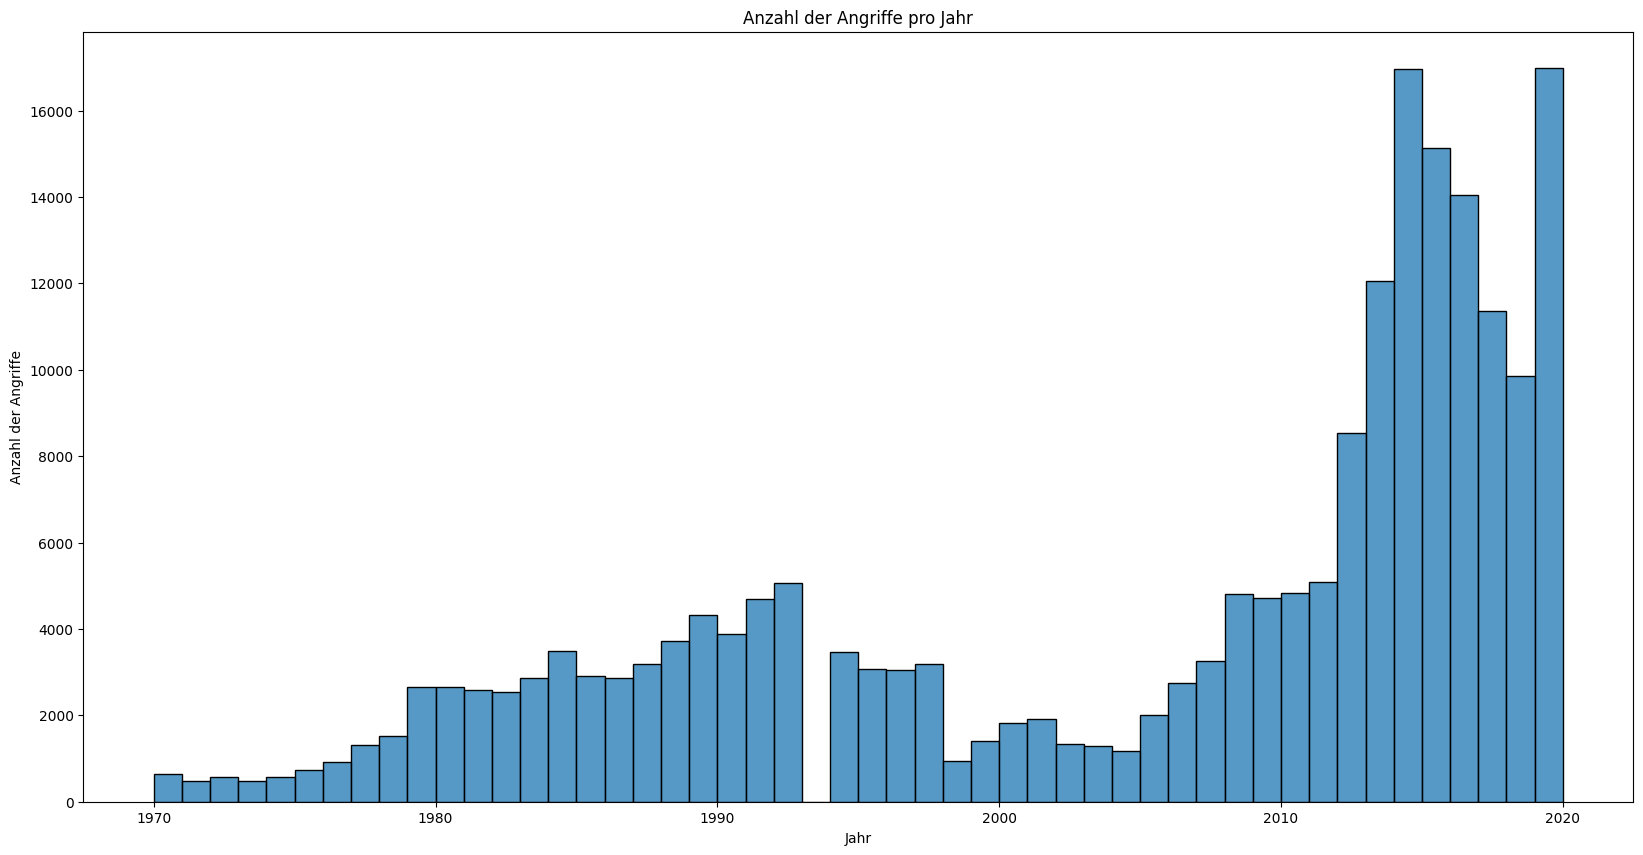

In [5]:
# histogramm der Anzahl der Angriffe pro Jahr
plt.figure(figsize=(20,10))
sns.histplot(df['iyear'], bins=50, kde=False)
plt.title('Anzahl der Angriffe pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Angriffe')
plt.show()

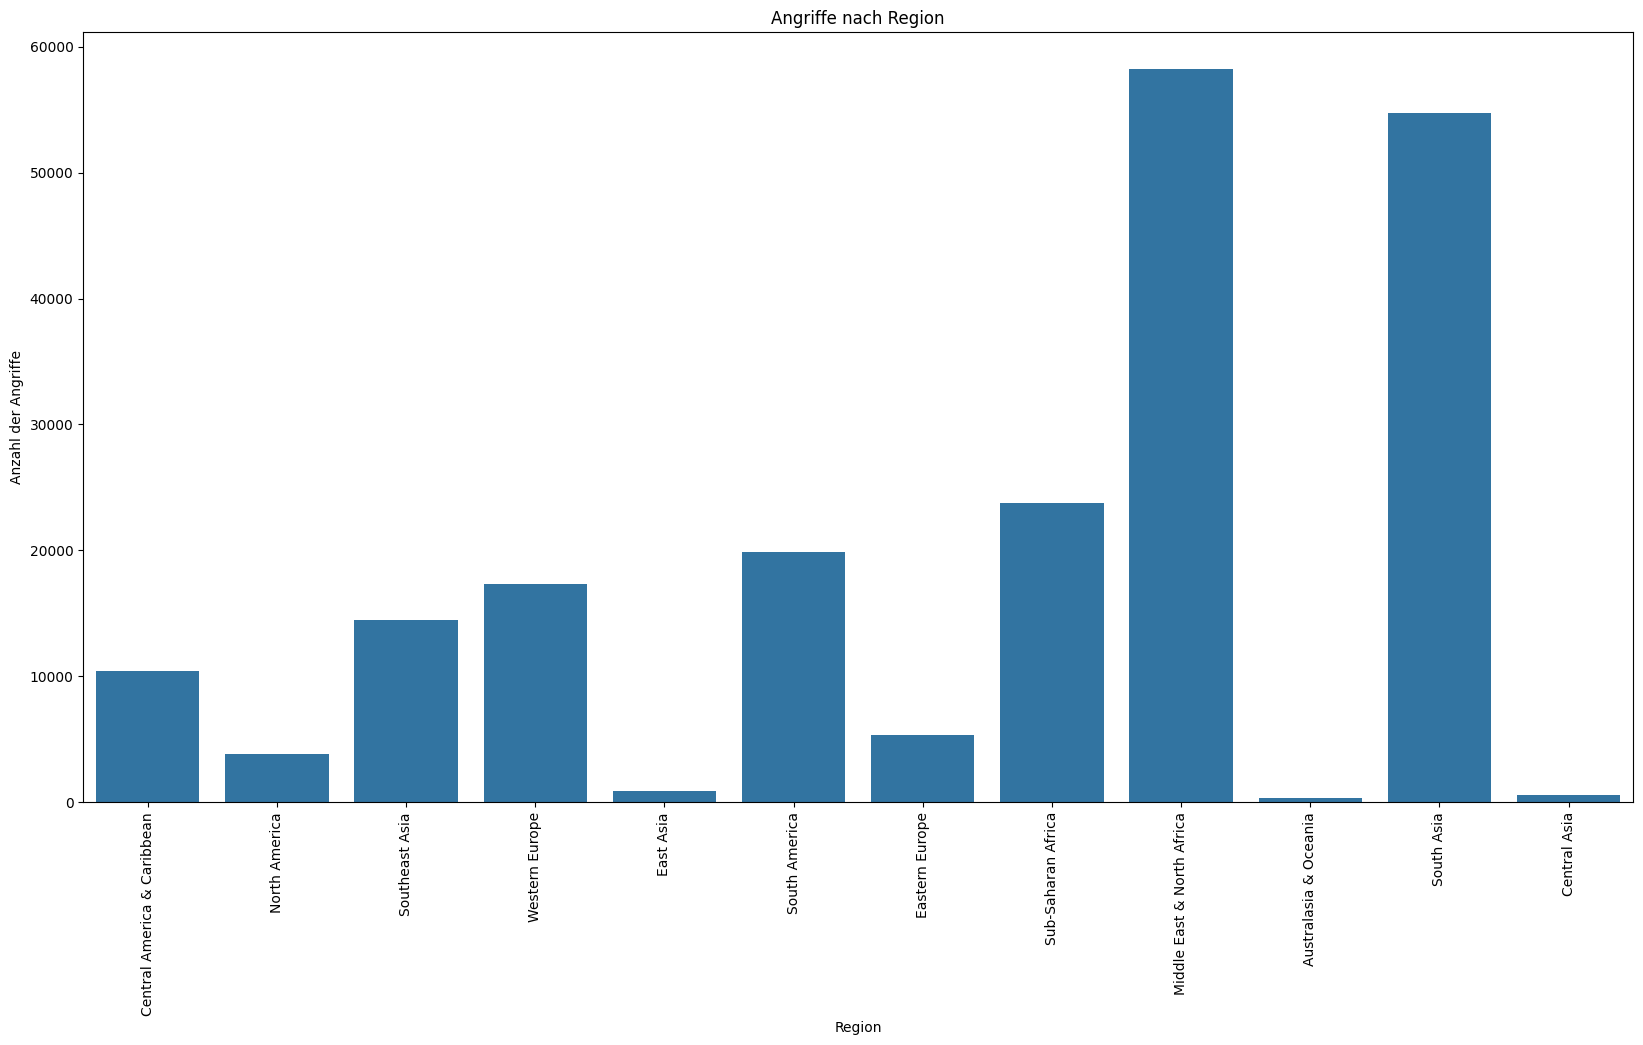

In [6]:
# Angriffe nach Region
plt.figure(figsize=(20,10))
sns.countplot(x='region_txt', data=df)
plt.title('Angriffe nach Region')   
plt.xlabel('Region')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


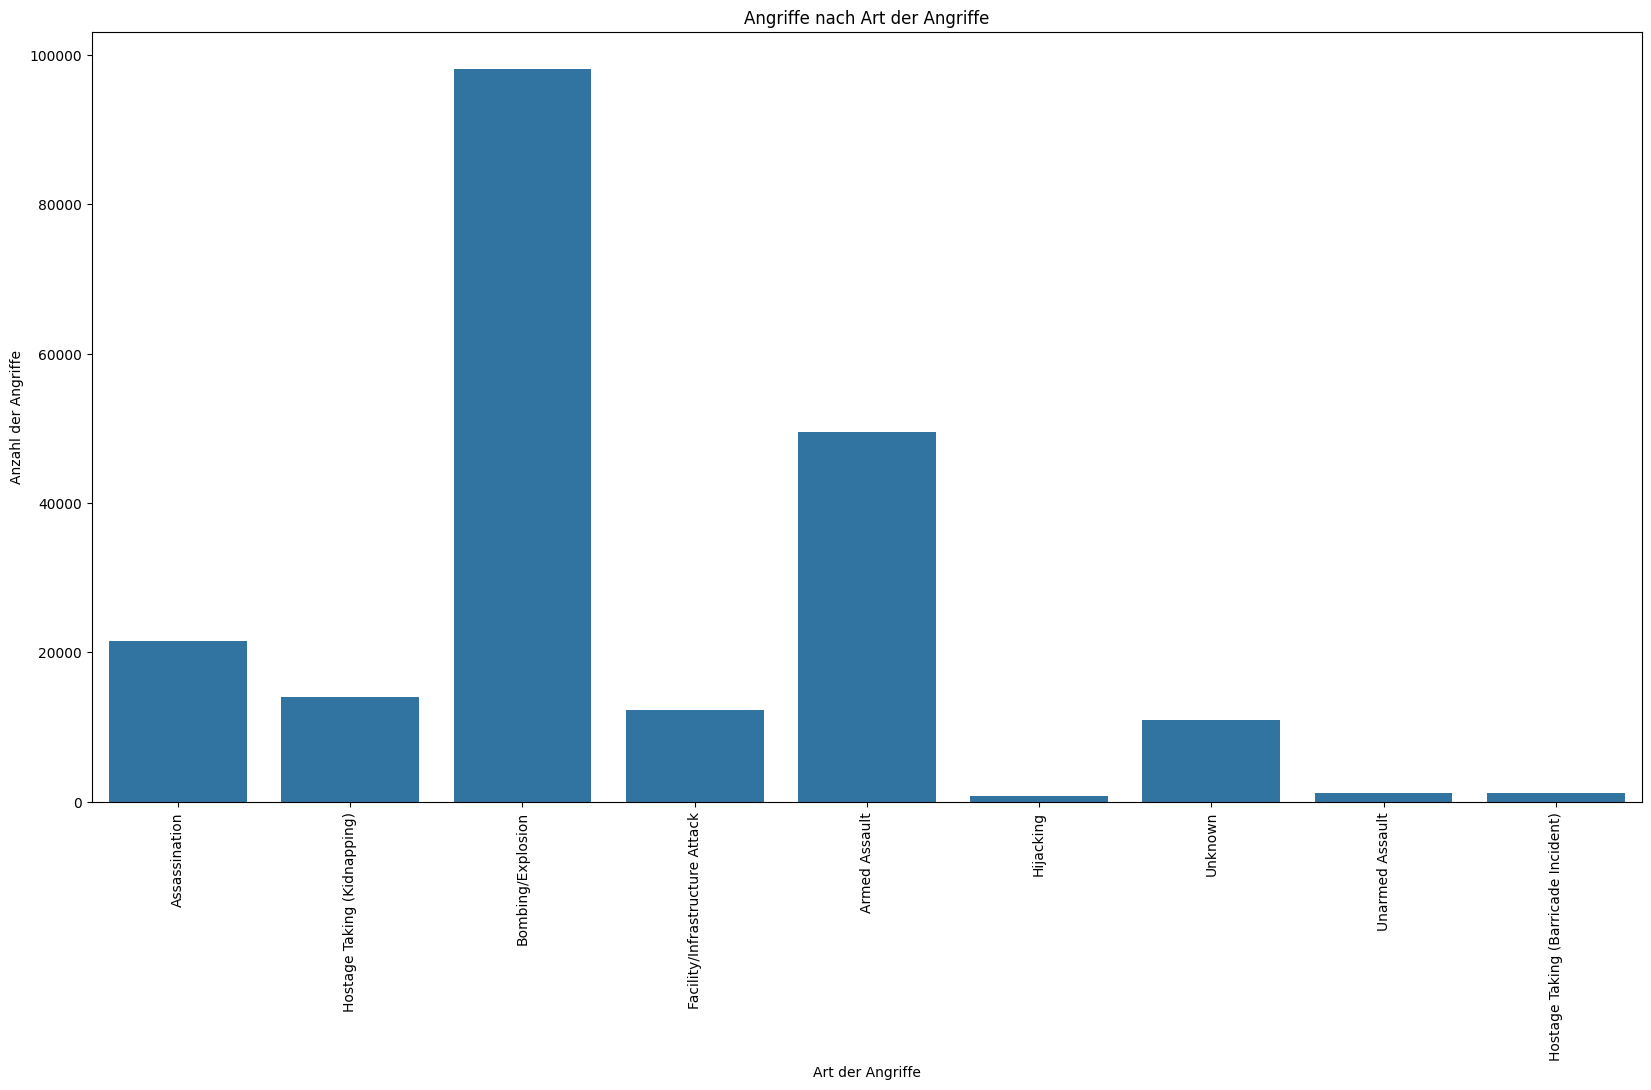

In [7]:
# Angriffe nach Art der Angriffe
plt.figure(figsize=(20,10))
sns.countplot(x='attacktype1_txt', data=df)
plt.title('Angriffe nach Art der Angriffe')
plt.xlabel('Art der Angriffe')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

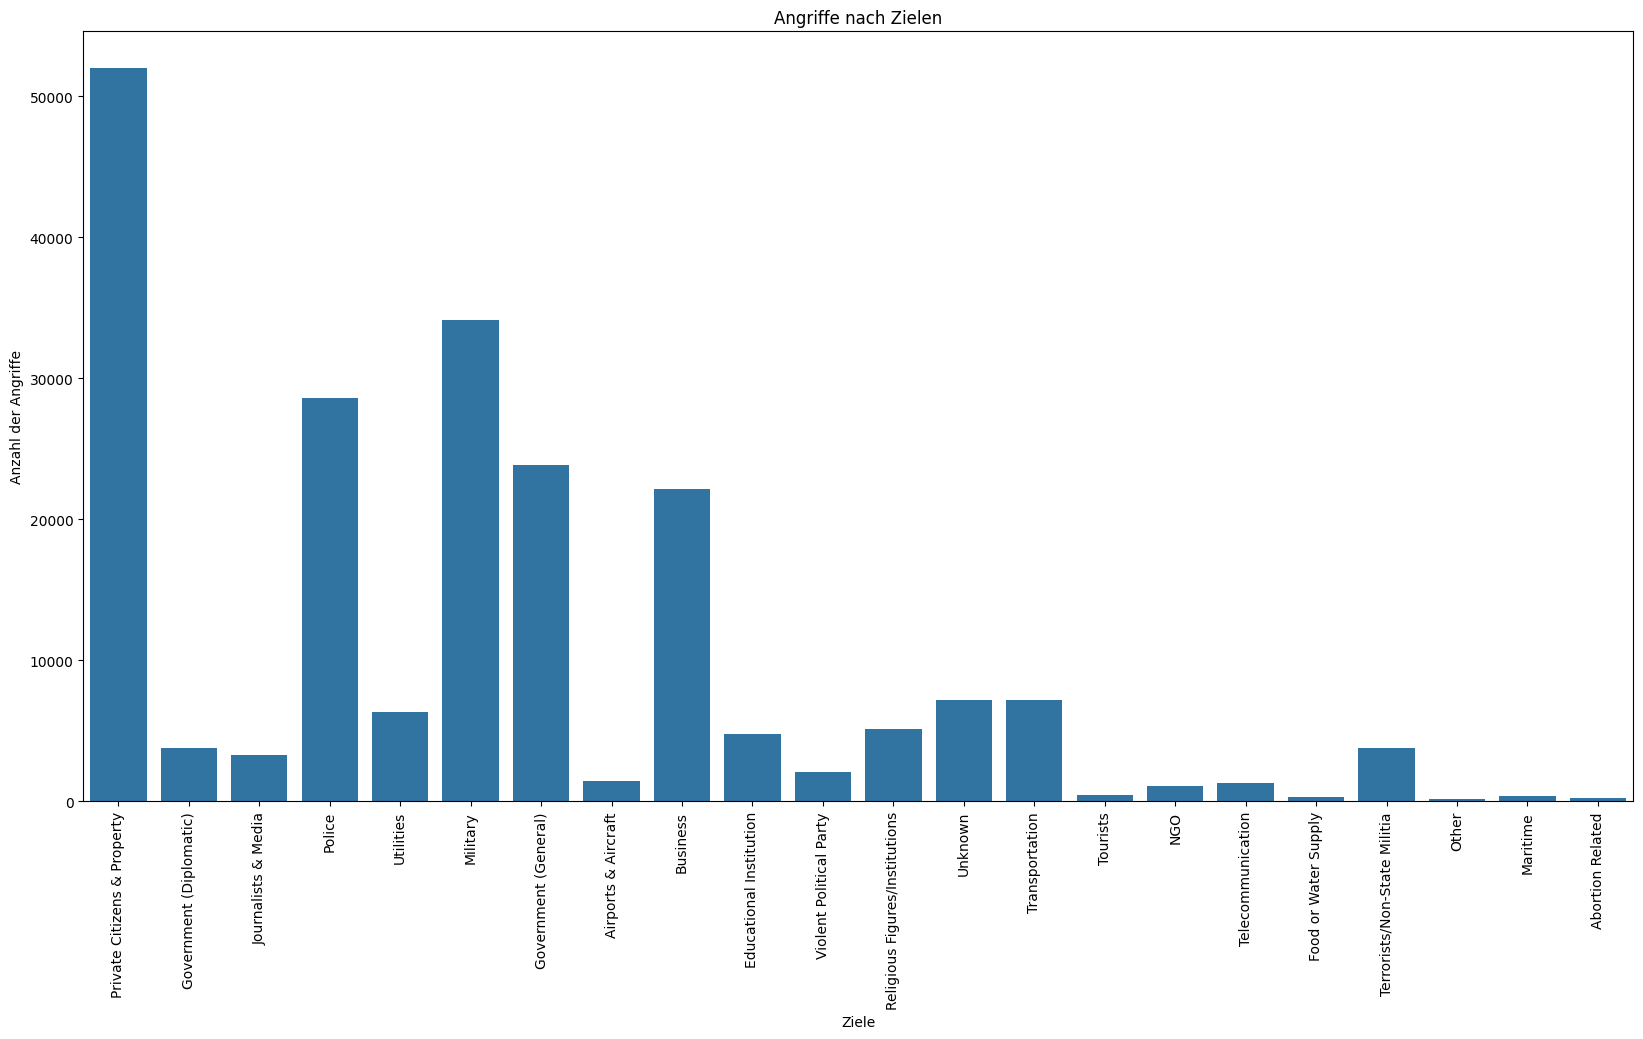

In [10]:
# Angriffe nach Zielen
plt.figure(figsize=(20,10))
sns.countplot(x='targtype1_txt', data=df)
plt.title('Angriffe nach Zielen')
plt.xlabel('Ziele')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


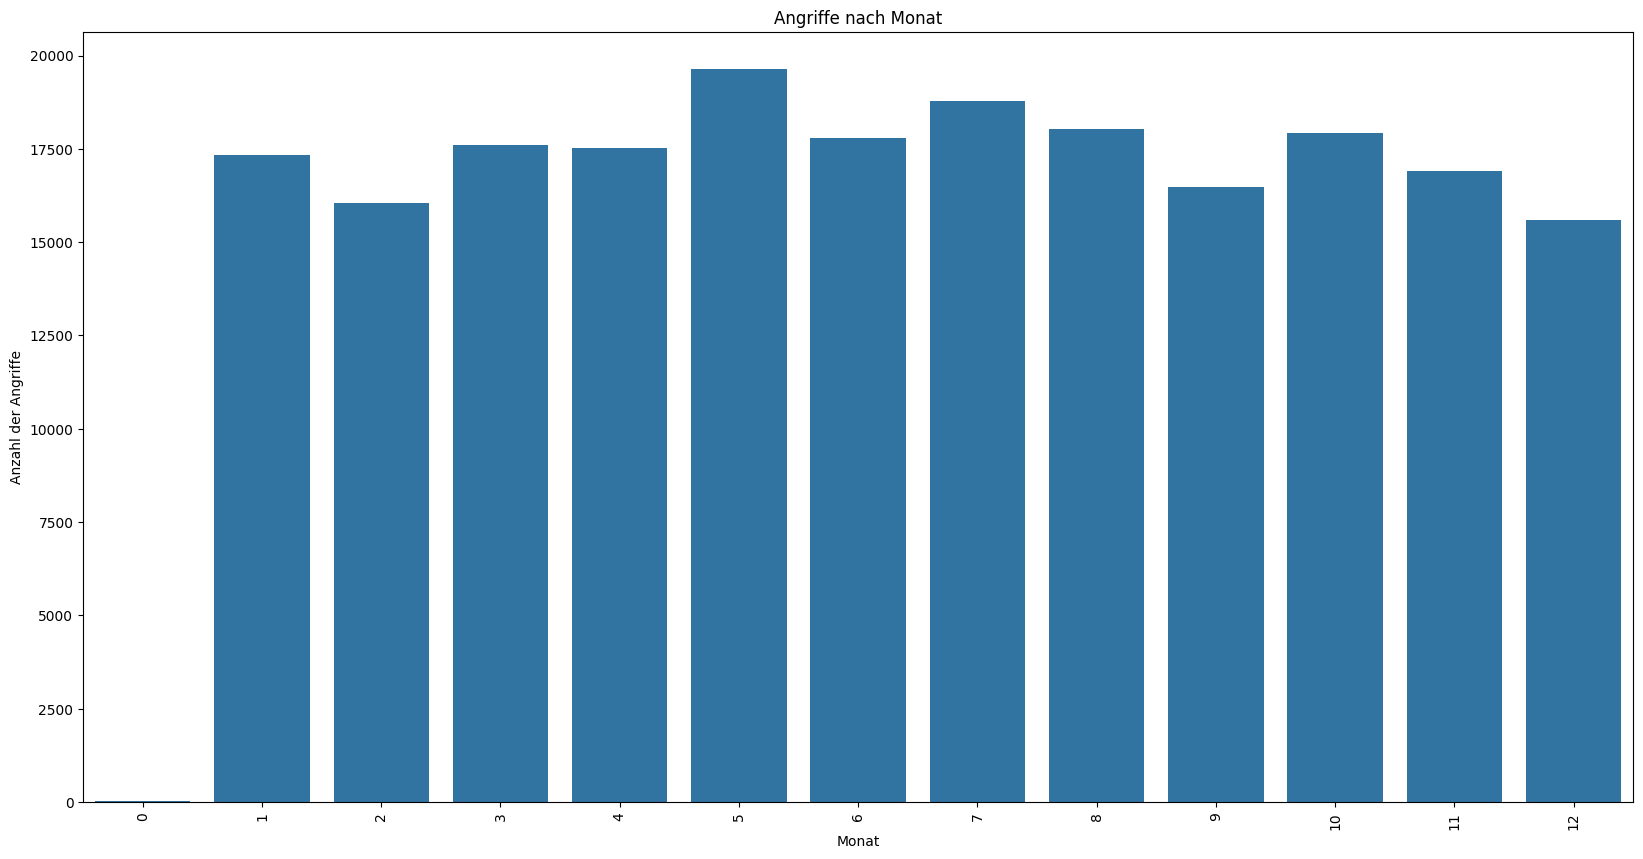

In [11]:
# Angriffe nach Monat
plt.figure(figsize=(20,10))
sns.countplot(x='imonth', data=df)
plt.title('Angriffe nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

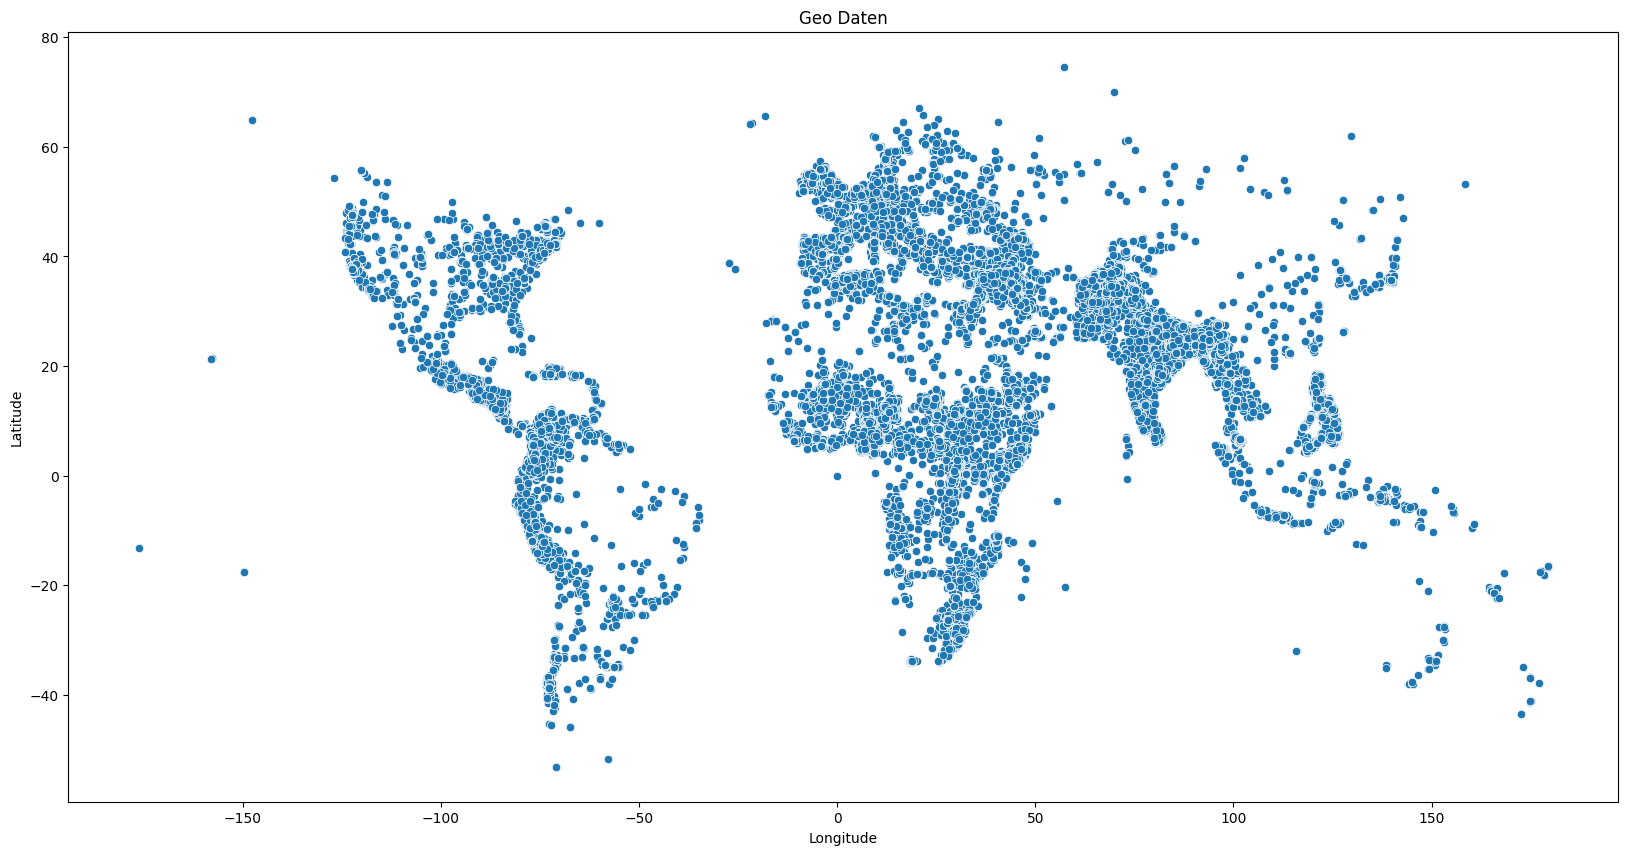

In [22]:
# Analyser der Geo Daten
plt.figure(figsize=(20,10))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('Geo Daten')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

2.2858096573297857


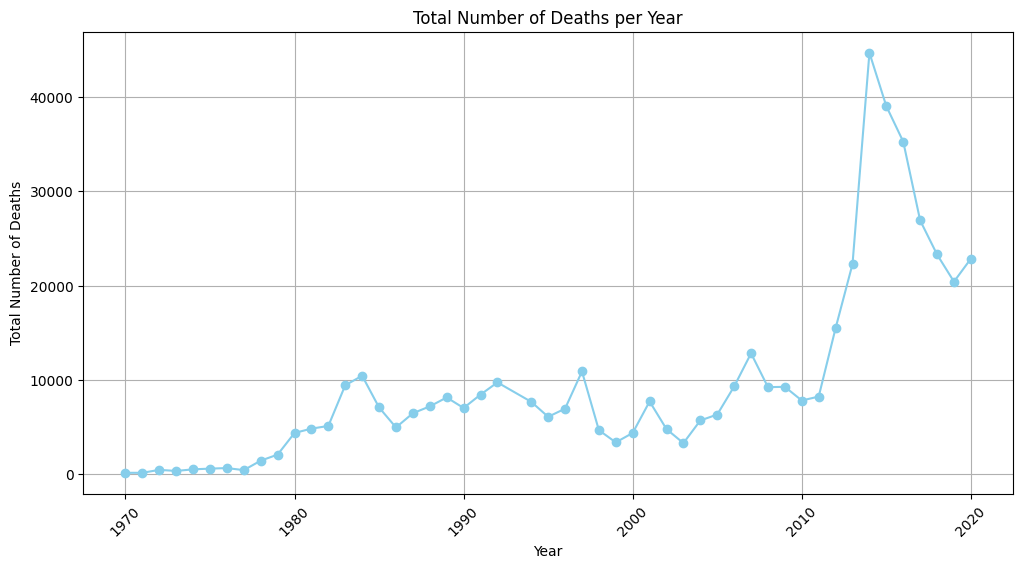

In [30]:
# durchschittliche Anzahl der Todesopfer pro Angriff
print(df['nkill'].mean())

# Aggregieren der totalen Anzahl der Todesopfer pro Jahr
total_deaths_per_year = df.groupby('iyear')['nkill'].sum().reset_index()

# Visualisierung als Liniendiagramm
plt.figure(figsize=(12, 6))
plt.plot(total_deaths_per_year['iyear'], total_deaths_per_year['nkill'], marker='o', color='skyblue')
plt.title('Total Number of Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.grid()
plt.show()

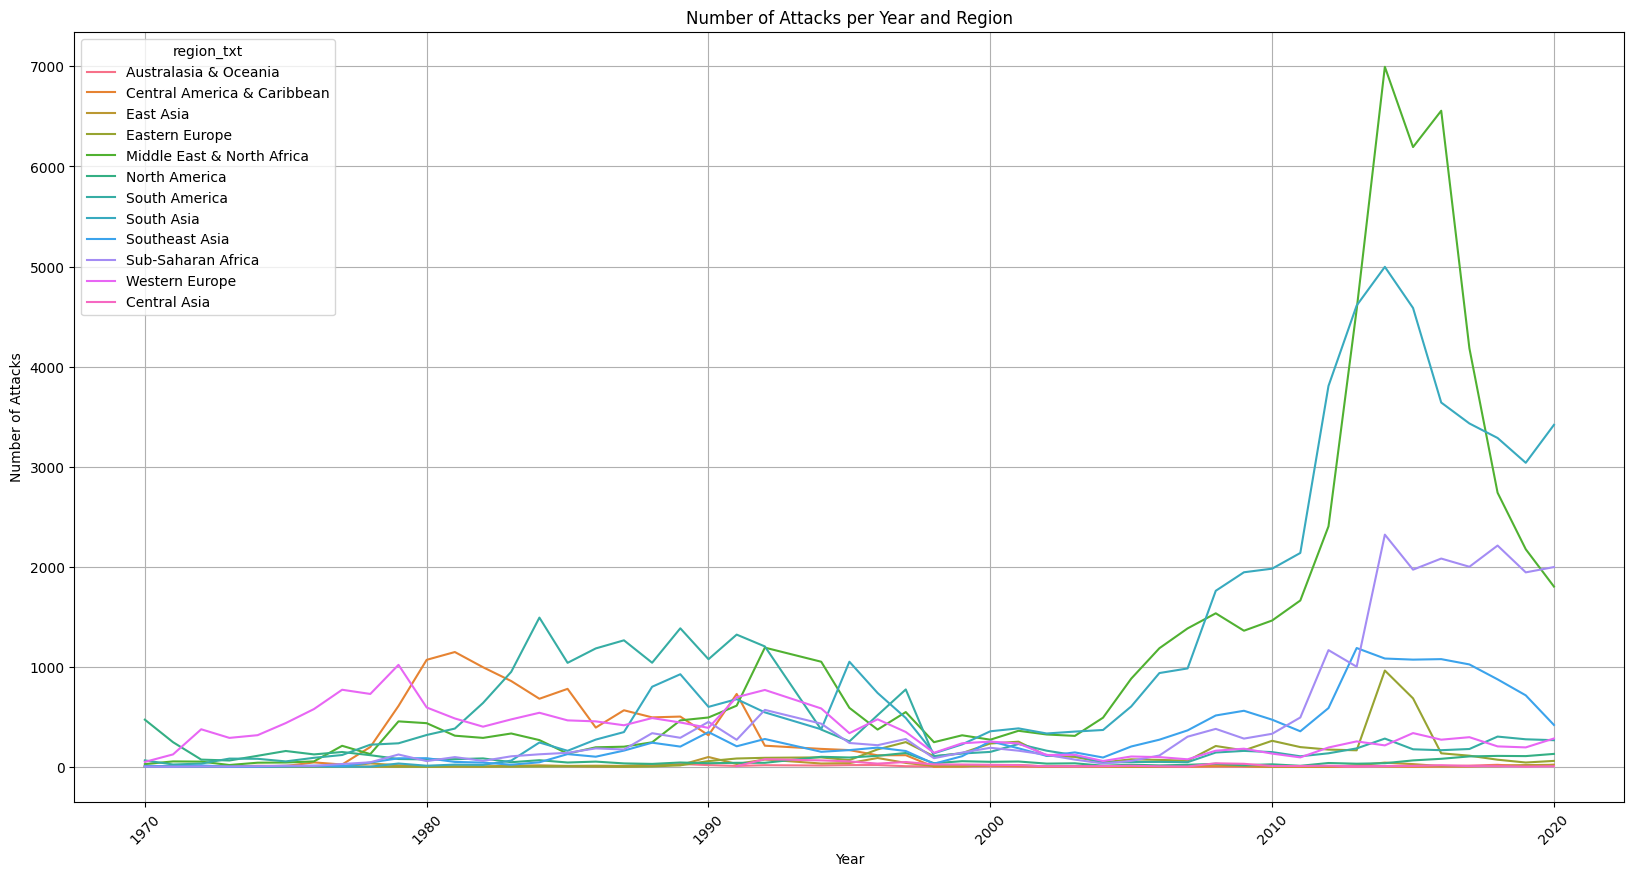

In [35]:
# entwicklung der Anzahl der Angriffe pro Jahr und Region
attacks_per_year_region = df.groupby(['iyear', 'region_txt']).size().reset_index(name='attack_count')

plt.figure(figsize=(20, 10))
sns.lineplot(x='iyear', y='attack_count', hue='region_txt', data=attacks_per_year_region)
plt.title('Number of Attacks per Year and Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 3. Unifying & Transformation

## 4. Data Cleansing

## 5. Analysis & Validation

## 6. Feature Selection & Engineering

## 7. Anwendung in Machine Learning

## 8. Anwendung von XAI - Techniken

## 9. Fazit

## 10. Quellenverzeichnis

START (National Consortium for the Study of Terrorism and Responses to Terrorism) (2022). *Global Terrorism Database 1970 - 2020 [Data set].* https://www.start.umd.edu/gtd

